### Visualization
We will visualize the results after training in this notebook. 
- Plain sampling oversamples empty spaces in the western united states, so we cherrypick some good samples
- The results are very finicky if we pick any sample and try embedding manipulations; So, we try to cherry pick some good examples.
- This need should go away once we have a decent trainned example
- all these indices are for level14 zoom and tiles generated using url generator. If that file changes, all these will become garbage.

### Common Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style("darkgrid")
from PIL import Image
from torchvision import transforms
import torch

import torchvision
from torch.utils.data.sampler import WeightedRandomSampler
from tensorboardX import SummaryWriter
import seaborn as sns
sns.set_style("darkgrid")

!pip install --upgrade numpy

In [3]:
from networks import Loc2Vec
from datasets import GeoTileInferDataset, get_files_from_path, cleanse_files
from config import IMG_SIZE
# from map_network import Geo2Vec
# from map_datasets import GeoTileInferDataset, IMG_SIZE, get_files_from_path, cleanse_files

In [4]:
cuda = torch.cuda.is_available()

In [5]:
checkpoint_file = './checkpoint_0.pth'

In [6]:
model = Loc2Vec()
model = torch.load(checkpoint_file)
model.eval()
if cuda:
    model.cuda()

C:\Users\vinograd\Anaconda3_12\envs\pytorch_gpu\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torchvision.models.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\vinograd\Anaconda3_12\envs\pytorch_gpu\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\vinograd\Anaconda3_12\envs\pytorch_gpu\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can re

In [41]:
pathstring="tile/256"
Path(pathstring).glob("*.png")

<generator object Path.glob at 0x00000206B29CAEB8>

In [52]:
for one_item in Path("./tiles/256").glob("**/*.png"):
    print(f"{one_item}: {type(one_item)}")

tiles\256\0.png: <class 'pathlib.WindowsPath'>
tiles\256\1.png: <class 'pathlib.WindowsPath'>
tiles\256\10.png: <class 'pathlib.WindowsPath'>
tiles\256\100.png: <class 'pathlib.WindowsPath'>
tiles\256\1000.png: <class 'pathlib.WindowsPath'>
tiles\256\10000.png: <class 'pathlib.WindowsPath'>
tiles\256\10001.png: <class 'pathlib.WindowsPath'>
tiles\256\10002.png: <class 'pathlib.WindowsPath'>
tiles\256\10003.png: <class 'pathlib.WindowsPath'>
tiles\256\10004.png: <class 'pathlib.WindowsPath'>
tiles\256\10005.png: <class 'pathlib.WindowsPath'>
tiles\256\10006.png: <class 'pathlib.WindowsPath'>
tiles\256\10007.png: <class 'pathlib.WindowsPath'>
tiles\256\10008.png: <class 'pathlib.WindowsPath'>
tiles\256\10009.png: <class 'pathlib.WindowsPath'>
tiles\256\1001.png: <class 'pathlib.WindowsPath'>
tiles\256\10010.png: <class 'pathlib.WindowsPath'>
tiles\256\10011.png: <class 'pathlib.WindowsPath'>
tiles\256\10012.png: <class 'pathlib.WindowsPath'>
tiles\256\10013.png: <class 'pathlib.WindowsPa

tiles\256\10286.png: <class 'pathlib.WindowsPath'>
tiles\256\10287.png: <class 'pathlib.WindowsPath'>
tiles\256\10288.png: <class 'pathlib.WindowsPath'>
tiles\256\10289.png: <class 'pathlib.WindowsPath'>
tiles\256\1029.png: <class 'pathlib.WindowsPath'>
tiles\256\10290.png: <class 'pathlib.WindowsPath'>
tiles\256\10291.png: <class 'pathlib.WindowsPath'>
tiles\256\10292.png: <class 'pathlib.WindowsPath'>
tiles\256\10293.png: <class 'pathlib.WindowsPath'>
tiles\256\10294.png: <class 'pathlib.WindowsPath'>
tiles\256\10295.png: <class 'pathlib.WindowsPath'>
tiles\256\10296.png: <class 'pathlib.WindowsPath'>
tiles\256\10297.png: <class 'pathlib.WindowsPath'>
tiles\256\10298.png: <class 'pathlib.WindowsPath'>
tiles\256\10299.png: <class 'pathlib.WindowsPath'>
tiles\256\103.png: <class 'pathlib.WindowsPath'>
tiles\256\1030.png: <class 'pathlib.WindowsPath'>
tiles\256\10300.png: <class 'pathlib.WindowsPath'>
tiles\256\10301.png: <class 'pathlib.WindowsPath'>
tiles\256\10302.png: <class 'pathli

tiles\256\10575.png: <class 'pathlib.WindowsPath'>
tiles\256\10576.png: <class 'pathlib.WindowsPath'>
tiles\256\10577.png: <class 'pathlib.WindowsPath'>
tiles\256\10578.png: <class 'pathlib.WindowsPath'>
tiles\256\10579.png: <class 'pathlib.WindowsPath'>
tiles\256\1058.png: <class 'pathlib.WindowsPath'>
tiles\256\10580.png: <class 'pathlib.WindowsPath'>
tiles\256\10581.png: <class 'pathlib.WindowsPath'>
tiles\256\10582.png: <class 'pathlib.WindowsPath'>
tiles\256\10583.png: <class 'pathlib.WindowsPath'>
tiles\256\10584.png: <class 'pathlib.WindowsPath'>
tiles\256\10585.png: <class 'pathlib.WindowsPath'>
tiles\256\10586.png: <class 'pathlib.WindowsPath'>
tiles\256\10587.png: <class 'pathlib.WindowsPath'>
tiles\256\10588.png: <class 'pathlib.WindowsPath'>
tiles\256\10589.png: <class 'pathlib.WindowsPath'>
tiles\256\1059.png: <class 'pathlib.WindowsPath'>
tiles\256\10590.png: <class 'pathlib.WindowsPath'>
tiles\256\10591.png: <class 'pathlib.WindowsPath'>
tiles\256\10592.png: <class 'path

tiles\256\1072.png: <class 'pathlib.WindowsPath'>
tiles\256\10720.png: <class 'pathlib.WindowsPath'>
tiles\256\10721.png: <class 'pathlib.WindowsPath'>
tiles\256\10722.png: <class 'pathlib.WindowsPath'>
tiles\256\10723.png: <class 'pathlib.WindowsPath'>
tiles\256\10724.png: <class 'pathlib.WindowsPath'>
tiles\256\10725.png: <class 'pathlib.WindowsPath'>
tiles\256\10726.png: <class 'pathlib.WindowsPath'>
tiles\256\10727.png: <class 'pathlib.WindowsPath'>
tiles\256\10728.png: <class 'pathlib.WindowsPath'>
tiles\256\10729.png: <class 'pathlib.WindowsPath'>
tiles\256\1073.png: <class 'pathlib.WindowsPath'>
tiles\256\10730.png: <class 'pathlib.WindowsPath'>
tiles\256\10731.png: <class 'pathlib.WindowsPath'>
tiles\256\10732.png: <class 'pathlib.WindowsPath'>
tiles\256\10733.png: <class 'pathlib.WindowsPath'>
tiles\256\10734.png: <class 'pathlib.WindowsPath'>
tiles\256\10735.png: <class 'pathlib.WindowsPath'>
tiles\256\10736.png: <class 'pathlib.WindowsPath'>
tiles\256\10737.png: <class 'path

tiles\256\11008.png: <class 'pathlib.WindowsPath'>
tiles\256\11009.png: <class 'pathlib.WindowsPath'>
tiles\256\1101.png: <class 'pathlib.WindowsPath'>
tiles\256\11010.png: <class 'pathlib.WindowsPath'>
tiles\256\11011.png: <class 'pathlib.WindowsPath'>
tiles\256\11012.png: <class 'pathlib.WindowsPath'>
tiles\256\11013.png: <class 'pathlib.WindowsPath'>
tiles\256\11014.png: <class 'pathlib.WindowsPath'>
tiles\256\11015.png: <class 'pathlib.WindowsPath'>
tiles\256\11016.png: <class 'pathlib.WindowsPath'>
tiles\256\11017.png: <class 'pathlib.WindowsPath'>
tiles\256\11018.png: <class 'pathlib.WindowsPath'>
tiles\256\11019.png: <class 'pathlib.WindowsPath'>
tiles\256\1102.png: <class 'pathlib.WindowsPath'>
tiles\256\11020.png: <class 'pathlib.WindowsPath'>
tiles\256\11021.png: <class 'pathlib.WindowsPath'>
tiles\256\11022.png: <class 'pathlib.WindowsPath'>
tiles\256\11023.png: <class 'pathlib.WindowsPath'>
tiles\256\11024.png: <class 'pathlib.WindowsPath'>
tiles\256\11025.png: <class 'path

tiles\256\11297.png: <class 'pathlib.WindowsPath'>
tiles\256\11298.png: <class 'pathlib.WindowsPath'>
tiles\256\11299.png: <class 'pathlib.WindowsPath'>
tiles\256\113.png: <class 'pathlib.WindowsPath'>
tiles\256\1130.png: <class 'pathlib.WindowsPath'>
tiles\256\11300.png: <class 'pathlib.WindowsPath'>
tiles\256\11301.png: <class 'pathlib.WindowsPath'>
tiles\256\11302.png: <class 'pathlib.WindowsPath'>
tiles\256\11303.png: <class 'pathlib.WindowsPath'>
tiles\256\11304.png: <class 'pathlib.WindowsPath'>
tiles\256\11305.png: <class 'pathlib.WindowsPath'>
tiles\256\11306.png: <class 'pathlib.WindowsPath'>
tiles\256\11307.png: <class 'pathlib.WindowsPath'>
tiles\256\11308.png: <class 'pathlib.WindowsPath'>
tiles\256\11309.png: <class 'pathlib.WindowsPath'>
tiles\256\1131.png: <class 'pathlib.WindowsPath'>
tiles\256\11310.png: <class 'pathlib.WindowsPath'>
tiles\256\11311.png: <class 'pathlib.WindowsPath'>
tiles\256\11312.png: <class 'pathlib.WindowsPath'>
tiles\256\11313.png: <class 'pathli

tiles\256\11586.png: <class 'pathlib.WindowsPath'>
tiles\256\11587.png: <class 'pathlib.WindowsPath'>
tiles\256\11588.png: <class 'pathlib.WindowsPath'>
tiles\256\11589.png: <class 'pathlib.WindowsPath'>
tiles\256\1159.png: <class 'pathlib.WindowsPath'>
tiles\256\11590.png: <class 'pathlib.WindowsPath'>
tiles\256\11591.png: <class 'pathlib.WindowsPath'>
tiles\256\11592.png: <class 'pathlib.WindowsPath'>
tiles\256\11593.png: <class 'pathlib.WindowsPath'>
tiles\256\11594.png: <class 'pathlib.WindowsPath'>
tiles\256\11595.png: <class 'pathlib.WindowsPath'>
tiles\256\11596.png: <class 'pathlib.WindowsPath'>
tiles\256\11597.png: <class 'pathlib.WindowsPath'>
tiles\256\11598.png: <class 'pathlib.WindowsPath'>
tiles\256\11599.png: <class 'pathlib.WindowsPath'>
tiles\256\116.png: <class 'pathlib.WindowsPath'>
tiles\256\1160.png: <class 'pathlib.WindowsPath'>
tiles\256\11600.png: <class 'pathlib.WindowsPath'>
tiles\256\11601.png: <class 'pathlib.WindowsPath'>
tiles\256\11602.png: <class 'pathli

tiles\256\11875.png: <class 'pathlib.WindowsPath'>
tiles\256\11876.png: <class 'pathlib.WindowsPath'>
tiles\256\11877.png: <class 'pathlib.WindowsPath'>
tiles\256\11878.png: <class 'pathlib.WindowsPath'>
tiles\256\11879.png: <class 'pathlib.WindowsPath'>
tiles\256\1188.png: <class 'pathlib.WindowsPath'>
tiles\256\11880.png: <class 'pathlib.WindowsPath'>
tiles\256\11881.png: <class 'pathlib.WindowsPath'>
tiles\256\11882.png: <class 'pathlib.WindowsPath'>
tiles\256\11883.png: <class 'pathlib.WindowsPath'>
tiles\256\11884.png: <class 'pathlib.WindowsPath'>
tiles\256\11885.png: <class 'pathlib.WindowsPath'>
tiles\256\11886.png: <class 'pathlib.WindowsPath'>
tiles\256\11887.png: <class 'pathlib.WindowsPath'>
tiles\256\11888.png: <class 'pathlib.WindowsPath'>
tiles\256\11889.png: <class 'pathlib.WindowsPath'>
tiles\256\1189.png: <class 'pathlib.WindowsPath'>
tiles\256\11890.png: <class 'pathlib.WindowsPath'>
tiles\256\11891.png: <class 'pathlib.WindowsPath'>
tiles\256\11892.png: <class 'path

tiles\256\12163.png: <class 'pathlib.WindowsPath'>
tiles\256\12164.png: <class 'pathlib.WindowsPath'>
tiles\256\12165.png: <class 'pathlib.WindowsPath'>
tiles\256\12166.png: <class 'pathlib.WindowsPath'>
tiles\256\12167.png: <class 'pathlib.WindowsPath'>
tiles\256\12168.png: <class 'pathlib.WindowsPath'>
tiles\256\12169.png: <class 'pathlib.WindowsPath'>
tiles\256\1217.png: <class 'pathlib.WindowsPath'>
tiles\256\12170.png: <class 'pathlib.WindowsPath'>
tiles\256\12171.png: <class 'pathlib.WindowsPath'>
tiles\256\12172.png: <class 'pathlib.WindowsPath'>
tiles\256\12173.png: <class 'pathlib.WindowsPath'>
tiles\256\12174.png: <class 'pathlib.WindowsPath'>
tiles\256\12175.png: <class 'pathlib.WindowsPath'>
tiles\256\12176.png: <class 'pathlib.WindowsPath'>
tiles\256\12177.png: <class 'pathlib.WindowsPath'>
tiles\256\12178.png: <class 'pathlib.WindowsPath'>
tiles\256\12179.png: <class 'pathlib.WindowsPath'>
tiles\256\1218.png: <class 'pathlib.WindowsPath'>
tiles\256\12180.png: <class 'path

tiles\256\12308.png: <class 'pathlib.WindowsPath'>
tiles\256\12309.png: <class 'pathlib.WindowsPath'>
tiles\256\1231.png: <class 'pathlib.WindowsPath'>
tiles\256\12310.png: <class 'pathlib.WindowsPath'>
tiles\256\12311.png: <class 'pathlib.WindowsPath'>
tiles\256\12312.png: <class 'pathlib.WindowsPath'>
tiles\256\12313.png: <class 'pathlib.WindowsPath'>
tiles\256\12314.png: <class 'pathlib.WindowsPath'>
tiles\256\12315.png: <class 'pathlib.WindowsPath'>
tiles\256\12316.png: <class 'pathlib.WindowsPath'>
tiles\256\12317.png: <class 'pathlib.WindowsPath'>
tiles\256\12318.png: <class 'pathlib.WindowsPath'>
tiles\256\12319.png: <class 'pathlib.WindowsPath'>
tiles\256\1232.png: <class 'pathlib.WindowsPath'>
tiles\256\12320.png: <class 'pathlib.WindowsPath'>
tiles\256\12321.png: <class 'pathlib.WindowsPath'>
tiles\256\12322.png: <class 'pathlib.WindowsPath'>
tiles\256\12323.png: <class 'pathlib.WindowsPath'>
tiles\256\12324.png: <class 'pathlib.WindowsPath'>
tiles\256\12325.png: <class 'path

tiles\256\12597.png: <class 'pathlib.WindowsPath'>
tiles\256\12598.png: <class 'pathlib.WindowsPath'>
tiles\256\12599.png: <class 'pathlib.WindowsPath'>
tiles\256\126.png: <class 'pathlib.WindowsPath'>
tiles\256\1260.png: <class 'pathlib.WindowsPath'>
tiles\256\12600.png: <class 'pathlib.WindowsPath'>
tiles\256\12601.png: <class 'pathlib.WindowsPath'>
tiles\256\12602.png: <class 'pathlib.WindowsPath'>
tiles\256\12603.png: <class 'pathlib.WindowsPath'>
tiles\256\12604.png: <class 'pathlib.WindowsPath'>
tiles\256\12605.png: <class 'pathlib.WindowsPath'>
tiles\256\12606.png: <class 'pathlib.WindowsPath'>
tiles\256\12607.png: <class 'pathlib.WindowsPath'>
tiles\256\12608.png: <class 'pathlib.WindowsPath'>
tiles\256\12609.png: <class 'pathlib.WindowsPath'>
tiles\256\1261.png: <class 'pathlib.WindowsPath'>
tiles\256\12610.png: <class 'pathlib.WindowsPath'>
tiles\256\12611.png: <class 'pathlib.WindowsPath'>
tiles\256\12612.png: <class 'pathlib.WindowsPath'>
tiles\256\12613.png: <class 'pathli

tiles\256\12886.png: <class 'pathlib.WindowsPath'>
tiles\256\12887.png: <class 'pathlib.WindowsPath'>
tiles\256\12888.png: <class 'pathlib.WindowsPath'>
tiles\256\12889.png: <class 'pathlib.WindowsPath'>
tiles\256\1289.png: <class 'pathlib.WindowsPath'>
tiles\256\12890.png: <class 'pathlib.WindowsPath'>
tiles\256\12891.png: <class 'pathlib.WindowsPath'>
tiles\256\12892.png: <class 'pathlib.WindowsPath'>
tiles\256\12893.png: <class 'pathlib.WindowsPath'>
tiles\256\12894.png: <class 'pathlib.WindowsPath'>
tiles\256\12895.png: <class 'pathlib.WindowsPath'>
tiles\256\12896.png: <class 'pathlib.WindowsPath'>
tiles\256\12897.png: <class 'pathlib.WindowsPath'>
tiles\256\12898.png: <class 'pathlib.WindowsPath'>
tiles\256\12899.png: <class 'pathlib.WindowsPath'>
tiles\256\129.png: <class 'pathlib.WindowsPath'>
tiles\256\1290.png: <class 'pathlib.WindowsPath'>
tiles\256\12900.png: <class 'pathlib.WindowsPath'>
tiles\256\12901.png: <class 'pathlib.WindowsPath'>
tiles\256\12902.png: <class 'pathli

KeyboardInterrupt: 

In [8]:
infer_transforms = transforms.Compose([
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])])
bs = 56
dset_eval = GeoTileInferDataset("./tiles/128",
                                center_transform=infer_transforms)
pd_files = dset_eval.get_file_df()
weights = pd_files.frequency
infer_sampler = WeightedRandomSampler(weights, len(dset_eval))
# Should numworkers be 1?
kwargs = {'num_workers': 0, 'pin_memory': True} if cuda else {} # orig 'num_workers': 8
online_eval_loader = torch.utils.data.DataLoader(dset_eval, batch_size=bs,
                                                 sampler=infer_sampler, **kwargs)

95216


### Get all embedding and store
we shall use the annoy library store all the vectors and built a tree based on the euclidean distance for fast retrival

In [9]:
from annoy import AnnoyIndex
t = AnnoyIndex(16, metric='euclidean')  # Length of item vector that will be indexed

In [24]:
t.get_nns_by_item(1,1)

[20426]

!pip install annoy

In [10]:
model.modules

<bound method Module.modules of Loc2Vec(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Se

In [11]:
torch.save(model.state_dict(), "model_new.pth")
model = Loc2Vec()
model.load_state_dict(torch.load("model_new.pth"))
model.eval()
if cuda:
    model.cuda()

In [12]:
%%time
with torch.no_grad():
    model.eval()
    val_loss = 0
    for batch_idx, (data, target) in enumerate(online_eval_loader):
        if cuda:
            data = data.cuda()
        outputs = model(data)
        for i in range(0, len(target)):
            t.add_item(target[i], outputs[i])
        if batch_idx % 300 == 0:
            print("Processed :", batch_idx, " items")

Processed : 0  items
Processed : 300  items
Processed : 600  items
Processed : 900  items
Processed : 1200  items
Processed : 1500  items
Wall time: 8min 30s


In [13]:
torch.__version__

'1.1.0'

In [14]:
t.build(25)
t.save('embeddings.ann')

True

In [17]:
emb128 = t.load('embeddings.ann')

In [19]:
emb128.

TypeError: 'bool' object is not subscriptable

In [31]:
def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 16))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            print(k)
            if k>10:
                return embeddings, labels
            #print(len(images))
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.forward(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

embeddings, labels = extract_embeddings(online_eval_loader, model)

0
56


In [44]:
# calculate semantic distances from an orbitrary point to 2 points
dset_eval = GeoTileInferDataset("./tiles/128",
                                center_transform=infer_transforms) # path to 1 image (if we don't want to change data_load code, we put 1 image in this folder)
pd_files = dset_eval.get_file_df() # 1 file
weights = pd_files.frequency # ndoesn't do anything in this case
infer_sampler = WeightedRandomSampler(weights, len(dset_eval)) # pseudo-sampling, also unnecessary
kwargs = {'num_workers': 0, 'pin_memory': True} if cuda else {} # orig 'num_workers': 8
bs=1
online_eval_loader = torch.utils.data.DataLoader(dset_eval, batch_size=bs,
                                                 sampler=infer_sampler, **kwargs) # dataLoader object with 1 file
embeddingA, labelA = extract_embeddings(online_eval_loader, model) # label=index in the dataset, should be 0 in this case

# repeat for the point B (acquired finish of the track)
# ...
embeddingB, labelB

# repeat for the point c[i], one point in the point cloud C
# ...
embeddingc, labelc

# measure how different the tiles are
dist_abc = np.zeros((len(C)))
from scipy.spatial import distance
for c,i in enumerate(C): # for each point from the cloud
    dist_ac = distance.euclidean(embeddingA,embeddingc)
    dist_bc = distance.euclidean(embeddingB,embeddingc)
    dist_abc[i] = dist_ac + dist_bc 
# find minimal dist_abc
min_i = np.argmin(dist_abc)    
# C[min_i] is the semanticaly closest point 
# we can show the i-th tile and the i-th point on the map

In [33]:
embeddings

array([[102.7385025 ,   1.54067516, -42.50598145, ...,  15.38647175,
         51.95758438,  54.28443909],
       [102.6783371 ,   2.41974473, -42.66974258, ...,  15.48298836,
         51.35292053,  54.83175278],
       [102.66884613,   1.21625018, -43.05965424, ...,  15.89381027,
         51.9838295 ,  54.10161591],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [32]:
labels

array([90535.,  7571., 70605., ...,     0.,     0.,     0.])

In [16]:
pd_files =  dset_eval.get_file_df()

### Sample of tiles

Cherry picked indices are used in the indices and plotted. We will cross reference this when trying to see other results like interpolation and nearest neighbors.

If we don't do this, the sampling would largely sample uninteresting areas!

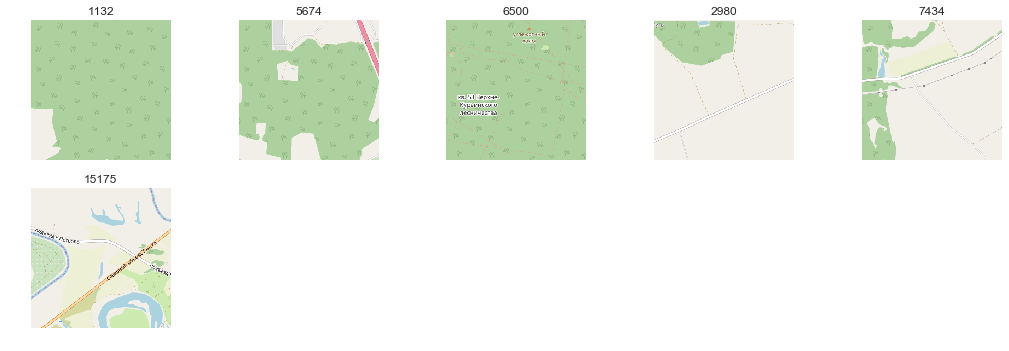

In [71]:
indices = [1132, 5674, 6500, 2980, 7434,
           15175]#, 752753, 86525, 633113, 725500, 417584, 751278, 746168, 751688]
columns = 5
rows = 6

w = 15
h = 15
fig = plt.figure(figsize=(18, 18))

for i, index in enumerate(indices):
    img = np.random.randint(10, size=(h, w))
    fig.add_subplot(rows, columns, i+1)
    img = Image.open(pd_files.path[index], 'r')
    data = img.convert('RGB')
    t_img = torch.from_numpy(np.asarray(data))
    t_img_np = t_img.numpy()
    plt.axis('off')
    plt.title(index)
    plt.imshow(t_img_np)

plt.show()

### Find nearest neighbors

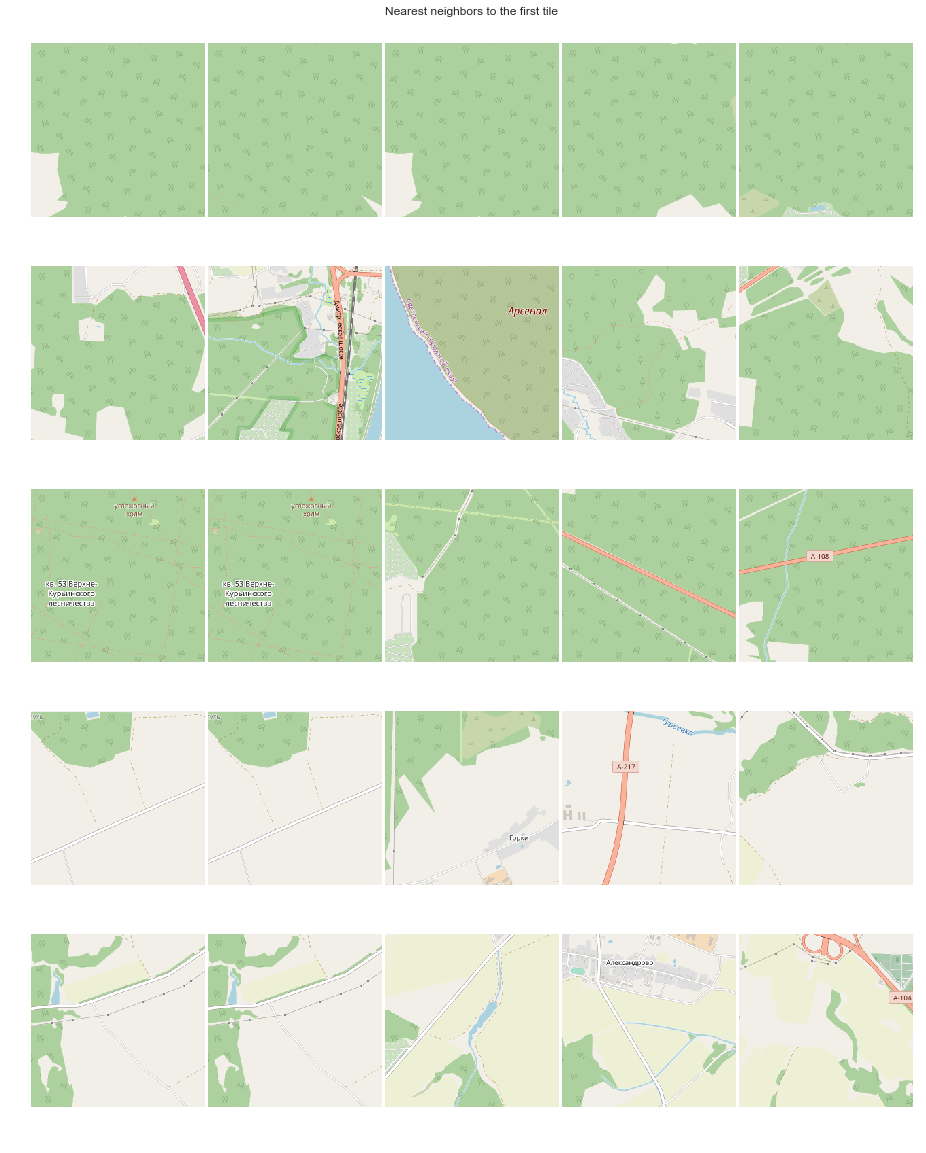

In [73]:
def get_sample_nn(row, column):
    samples = pd_files.sample(row)
    result = []
    for i in samples.index.values:
        result = result + [i]
        result = result + t.get_nns_by_item(i, column-1)
    return result


def get_nn(indices, column):
    result = []
    for i in indices:
        result = result + [i]
        result = result + t.get_nns_by_item(i, column-1)
    return result


columns = 5
rows = 5
# We run get_sample_nn multiple times to get interesting looking indices
# There are a lot of empty spaces, which would not provide good results
# due to data sampling; hence we cherry pick a few by uncommenting and 
# running the below; 
# results = get_sample_nn(rows, columns)
input_indices = [1132, 5674, 6500, 2980, 7434,
           15175]#[534212, 619328, 679405, 752753, 604364]
results = get_nn(input_indices[:rows], columns)

w = 15
h = 15
fig = plt.figure(figsize=(18, 22))

plt.subplots_adjust(left=0.32, bottom=0, right=1.0, top=0.7, wspace=0.02, hspace=0.02)
plt.title("Nearest neighbors to the first tile")
plt.axis('off')
for i, index in enumerate(results):
    img = np.random.randint(10, size=(h, w))
    fig.add_subplot(rows, columns, i+1)
    img = Image.open(pd_files.path[index], 'r')
    data = img.convert('RGB')
    t_img = torch.from_numpy(np.asarray(data))
    t_img_np = t_img.numpy()
#     plt.title(index)
    plt.axis('off')
    plt.imshow(t_img_np)

plt.show()

In [20]:
# extract embedding for a single image
# train on embeddings

### Interpolation between two embeddings
If the embeddings are good, there should be smooth interpolation between two different types of locations.

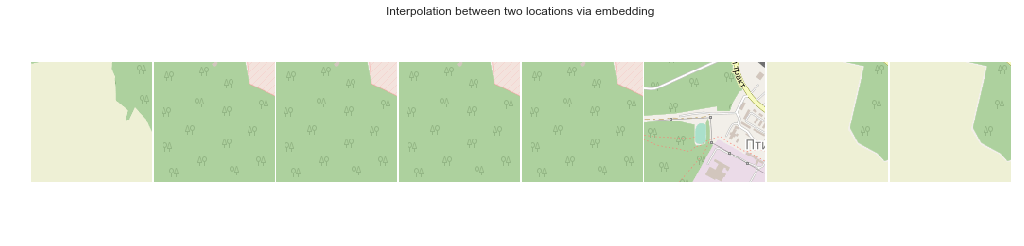

In [40]:
interpolation_size = 6
# interpolate from 185175 to 751688
from scipy.interpolate import interp1d
# These numbers are cherry picked. Once we train for longer, we can remove it
begin_index = 5550
end_index = 7570
fst = t.get_item_vector(begin_index)
snd = t.get_item_vector(end_index)
linfit = interp1d([1,interpolation_size], np.vstack([fst, snd]), axis=0)

item = []
item = item + [begin_index]
for i in range(0,interpolation_size):    
    item = item + t.get_nns_by_vector(linfit(i+1),1)

item = item + [end_index]
columns = 8
rows = 1


w=15
h=15
fig=plt.figure(figsize=(20,4))
plt.title("Interpolation between two locations via embedding")
plt.subplots_adjust(left=0.32, bottom=0, right=1.0, top=0.7, wspace=0.02, hspace=0.02)
plt.axis('off')
for i, index in enumerate(item):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
    img = Image.open(pd_files.path[index], 'r')
    data = img.convert('RGB')        
    t_img = torch.from_numpy(np.asarray(data))
    t_img_np = t_img.numpy()
#     plt.title(index)
    plt.axis('off')
    plt.imshow(t_img_np)
    
plt.show()

In [42]:
fst

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [41]:
snd

[102.61752319335938,
 2.2925496101379395,
 -42.33015060424805,
 104.12346649169922,
 56.53734588623047,
 78.55339813232422,
 -65.59247589111328,
 -113.22711181640625,
 45.02770233154297,
 61.6878662109375,
 29.26468849182129,
 36.59479904174805,
 40.13335037231445,
 15.411080360412598,
 51.5778694152832,
 54.82920837402344]

In [43]:
from scipy.spatial import distance
distance.euclidean(fst,snd)

255.347221239936

### PCA and TSNE plots


In [76]:
!rm -rf tensorboard/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
writer = SummaryWriter('tensorboard')
# https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/7
inv_normalize = transforms.Normalize(
    mean=[-0.485 * 0.229, -0.456 * 0.224, -0.406 * 0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

all_outputs = None
all_targets = None
all_data = None
with torch.no_grad():
    model.eval()
    val_loss = 0
    for batch_idx, (data, target) in enumerate(online_eval_loader):
        if cuda:
            data = data.cuda()
        outputs = model(data)
#         outputs = outputs.data.cpu().numpy()
        if all_outputs is None:
#             print("in here")
            all_outputs = outputs.clone()
            all_targets = target.clone()
            all_data = data.clone()
        else:
#             print("nin here")
            all_outputs = torch.cat([outputs, all_outputs], 0)
            all_targets = torch.cat([target, all_targets], 0)
            all_data = torch.cat([data, all_data], 0)

        if batch_idx == 70:
            all_data = torch.stack([inv_normalize(data) for data in all_data],0)
            print(all_outputs.shape, all_targets.shape, all_data.shape)
            writer.add_embedding(all_outputs, metadata=all_targets, label_img=all_data)
            all_data = None
            all_outputs = None
            all_targets = None
            torch.cuda.empty_cache()
            break

torch.Size([3976, 16]) torch.Size([3976]) torch.Size([3976, 3, 128, 128])


If you run the following in the commandline, you should see PCA and TSNE Plots. Checking the 'spherical coordinates' box makes the plot look better.

`tensorboard --logdir tensorboard`
#### PCA 
![Interpolation](images/pca.png)
#### TSNE
![TSNE](images/tsne.png)

!tensorboard --logdir tensorboard

!pip install tensorboard
